# rf605_profilell

'LIKELIHOOD AND MINIMIZATION' RooFit tutorial macro #605

Working with the profile likelihood estimator




**Author:**  Clemens Lange, Wouter Verkerke (C version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:19 AM.</small></i>

In [1]:
import ROOT

Create model and dataset
-----------------------------------------------

Observable

In [2]:
x = ROOT.RooRealVar("x", "x", -20, 20)

Model (intentional strong correlations)

In [3]:
mean = ROOT.RooRealVar("mean", "mean of g1 and g2", 0, -10, 10)
sigma_g1 = ROOT.RooRealVar("sigma_g1", "width of g1", 3)
g1 = ROOT.RooGaussian("g1", "g1", x, mean, sigma_g1)

sigma_g2 = ROOT.RooRealVar("sigma_g2", "width of g2", 4, 3.0, 6.0)
g2 = ROOT.RooGaussian("g2", "g2", x, mean, sigma_g2)

frac = ROOT.RooRealVar("frac", "frac", 0.5, 0.0, 1.0)
model = ROOT.RooAddPdf("model", "model", [g1, g2], [frac])

[#0] WARNING:InputArguments -- The parameter 'sigma_g1' with range [-inf, inf] of the RooGaussian 'g1' exceeds the safe range of (0, inf). Advise to limit its range.


Generate 1000 events

In [4]:
data = model.generate({x}, 1000)

Construct plain likelihood
---------------------------------------------------

Construct unbinned likelihood

In [5]:
nll = model.createNLL(data, NumCPU=2)

[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2


Minimize likelihood w.r.t all parameters before making plots

In [6]:
ROOT.RooMinimizer(nll).migrad()

0

[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 2659.73712858695399
Edm   = 0.000190395763129910388
Nfcn  = 60
frac	  = 0.62118	 +/-  0.165788	(limited)
mean	  = 0.00442366	 +/-  0.109372	(limited)
sigma_g2	  = 4.10789	 +/-  0.405468	(limited)


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       2660.220684 Edm =      0.7531396215 NCalls =     11
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 2660.220684
  Edm           : 0.7531396215
  Internal parameters:	[                0                0    -0.3398369095]	
  Internal gradient  :	[      -5.61967122     -7.167795698      7.285345928]	
  Internal covariance matrix:
[[    0.058086658              0              0]
 [              0  0.00024709807              0]
 [              0              0    0.021957944]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       2660.220684 Edm =      0.7531396215 NCalls =     11
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       2659.835559 Edm =       0.009272903 NCalls =     19
Info in <Minuit2>: VariableMe

Plot likelihood scan frac

In [7]:
frame1 = frac.frame(Bins=10, Range=(0.01, 0.95), Title="LL and profileLL in frac")
nll.plotOn(frame1, ShiftToZero=True)

Plot likelihood scan in sigma_g2

In [8]:
frame2 = sigma_g2.frame(Bins=10, Range=(3.3, 5.0), Title="LL and profileLL in sigma_g2")
nll.plotOn(frame2, ShiftToZero=True)

Construct profile likelihood in frac
-----------------------------------------------------------------------

The profile likelihood estimator on nll for frac will minimize nll w.r.t
all floating parameters except frac for each evaluation

In [9]:
pll_frac = nll.createProfile({frac})

Plot the profile likelihood in frac

In [10]:
pll_frac.plotOn(frame1, LineColor="r")

[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[frac]) Creating instance of MINUIT
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[frac]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[frac]) minimum found at (frac=0.62104)
..................................................................................

Adjust frame maximum for visual clarity

In [11]:
frame1.SetMinimum(0)
frame1.SetMaximum(3)

Construct profile likelihood in sigma_g2
-------------------------------------------------------------------------------

The profile likelihood estimator on nll for sigma_g2 will minimize nll
w.r.t all floating parameters except sigma_g2 for each evaluation

In [12]:
pll_sigmag2 = nll.createProfile({sigma_g2})

Plot the profile likelihood in sigma_g2

In [13]:
pll_sigmag2.plotOn(frame2, LineColor="r")


[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[sigma_g2]) Creating instance of MINUIT
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[sigma_g2]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[sigma_g2]) minimum found at (sigma_g2=4.11258)
....................................................................................

Adjust frame maximum for visual clarity

In [14]:
frame2.SetMinimum(0)
frame2.SetMaximum(3)

Make canvas and draw ROOT.RooPlots

In [15]:
c = ROOT.TCanvas("rf605_profilell", "rf605_profilell", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()

c.SaveAs("rf605_profilell.png")

Info in <TCanvas::Print>: png file rf605_profilell.png has been created


Draw all canvases 

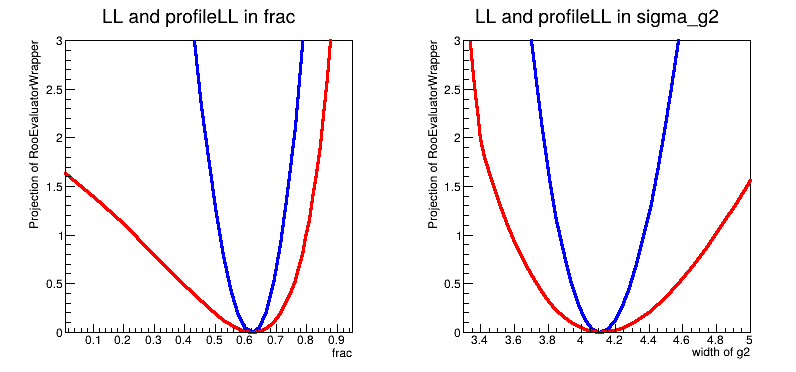

In [16]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()